In [14]:
# Importing Required libraries
!pip install opencv-python 
import os
import cv2
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Loading the folder
path=r'C:\Users\91849\Desktop\MP RUN\dataset\Training Data'
pd.DataFrame(os.listdir(path),columns=['Files'])

Files
0  train-smoke
1   train_fire

In [16]:
# Dividing the dataset into Training and Validation
train_data_dir =path
batch_size = 32
target_size = (224, 224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=44,
    image_size=target_size,
    batch_size=batch_size,)

Found 13733 files belonging to 2 classes.
Using 10987 files for training.
Found 13733 files belonging to 2 classes.
Using 2746 files for validation.


In [6]:
import os

fire_dir = os.path.join(train_data_dir, 'train_fire')
smoke_dir = os.path.join(train_data_dir, 'train-smoke')

num_fire_images = len(os.listdir(fire_dir))
num_smoke_images = len(os.listdir(smoke_dir))

print("Number of fire images:", num_fire_images)
print("Number of smoke images:", num_smoke_images)

Number of fire images: 1102
Number of smoke images: 12631


In [7]:
fire_count = 0
smoke_count = 0

for images, labels in train:
    for label in labels:
        if label == 0:  # Assuming fire class label is 0
            fire_count += 1
        else:
            smoke_count += 1

print("Number of fire images:", fire_count)
print("Number of smoke images:", smoke_count)

Number of fire images: 10128
Number of smoke images: 859


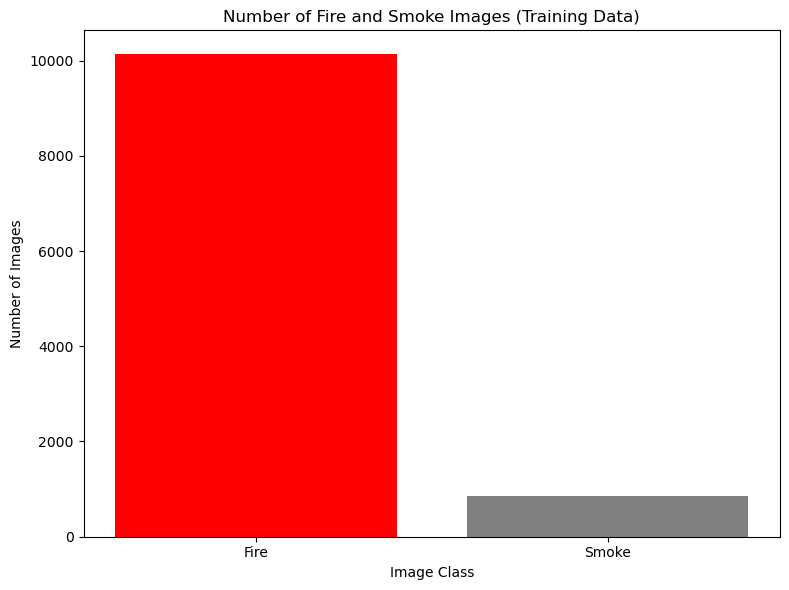

In [8]:
import matplotlib.pyplot as plt

# Assuming you have fire_count and smoke_count from your previous code

# Create data for the plot
labels = ['Fire', 'Smoke']
counts = [fire_count, smoke_count]

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(labels, counts, color=['red', 'gray'])
plt.xlabel('Image Class')
plt.ylabel('Number of Images')
plt.title('Number of Fire and Smoke Images (Training Data)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()


In [9]:
# Initialize counts for validation dataset
validation_fire_count = 0
validation_smoke_count = 0

# Count occurrences of each class label in the validation dataset
for images, labels in validation:
    for label in labels:
        if label == 0:  # Assuming fire class label is 0
            validation_fire_count += 1
        else:
            validation_smoke_count += 1

# Print counts for the validation dataset
print("Validation dataset:")
print("Number of fire images:", validation_fire_count)
print("Number of smoke images:", validation_smoke_count)

Validation dataset:
Number of fire images: 2520
Number of smoke images: 226


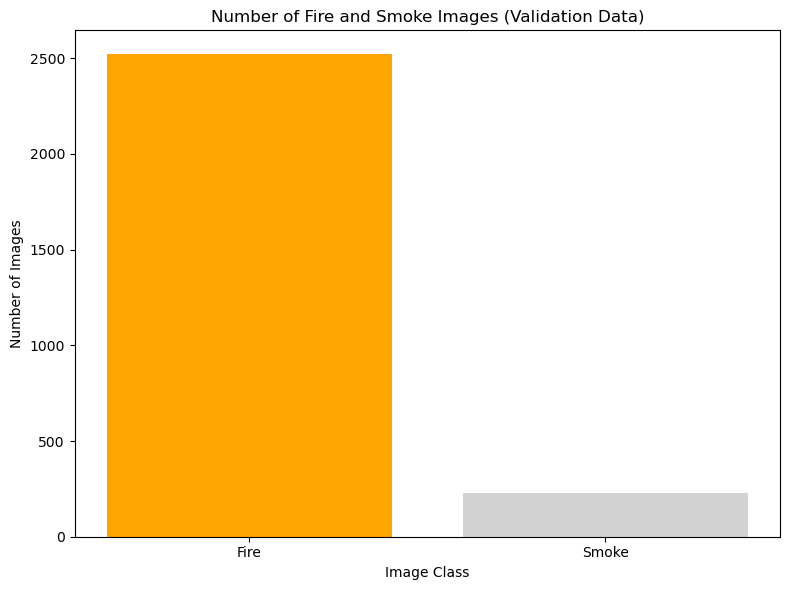

In [10]:
import matplotlib.pyplot as plt

# Assuming you have validation_fire_count and validation_smoke_count from your code

# Create data for the plot
labels = ['Fire', 'Smoke']
counts = [validation_fire_count, validation_smoke_count]

# Create the plot
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['orange', 'lightgray'])  # Use different colors for distinction
plt.xlabel('Image Class')
plt.ylabel('Number of Images')
plt.title('Number of Fire and Smoke Images (Validation Data)')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()


In [11]:
# Assining the labels as fire&smoke
class_names = train.class_names
class_names

['train-smoke', 'train_fire']

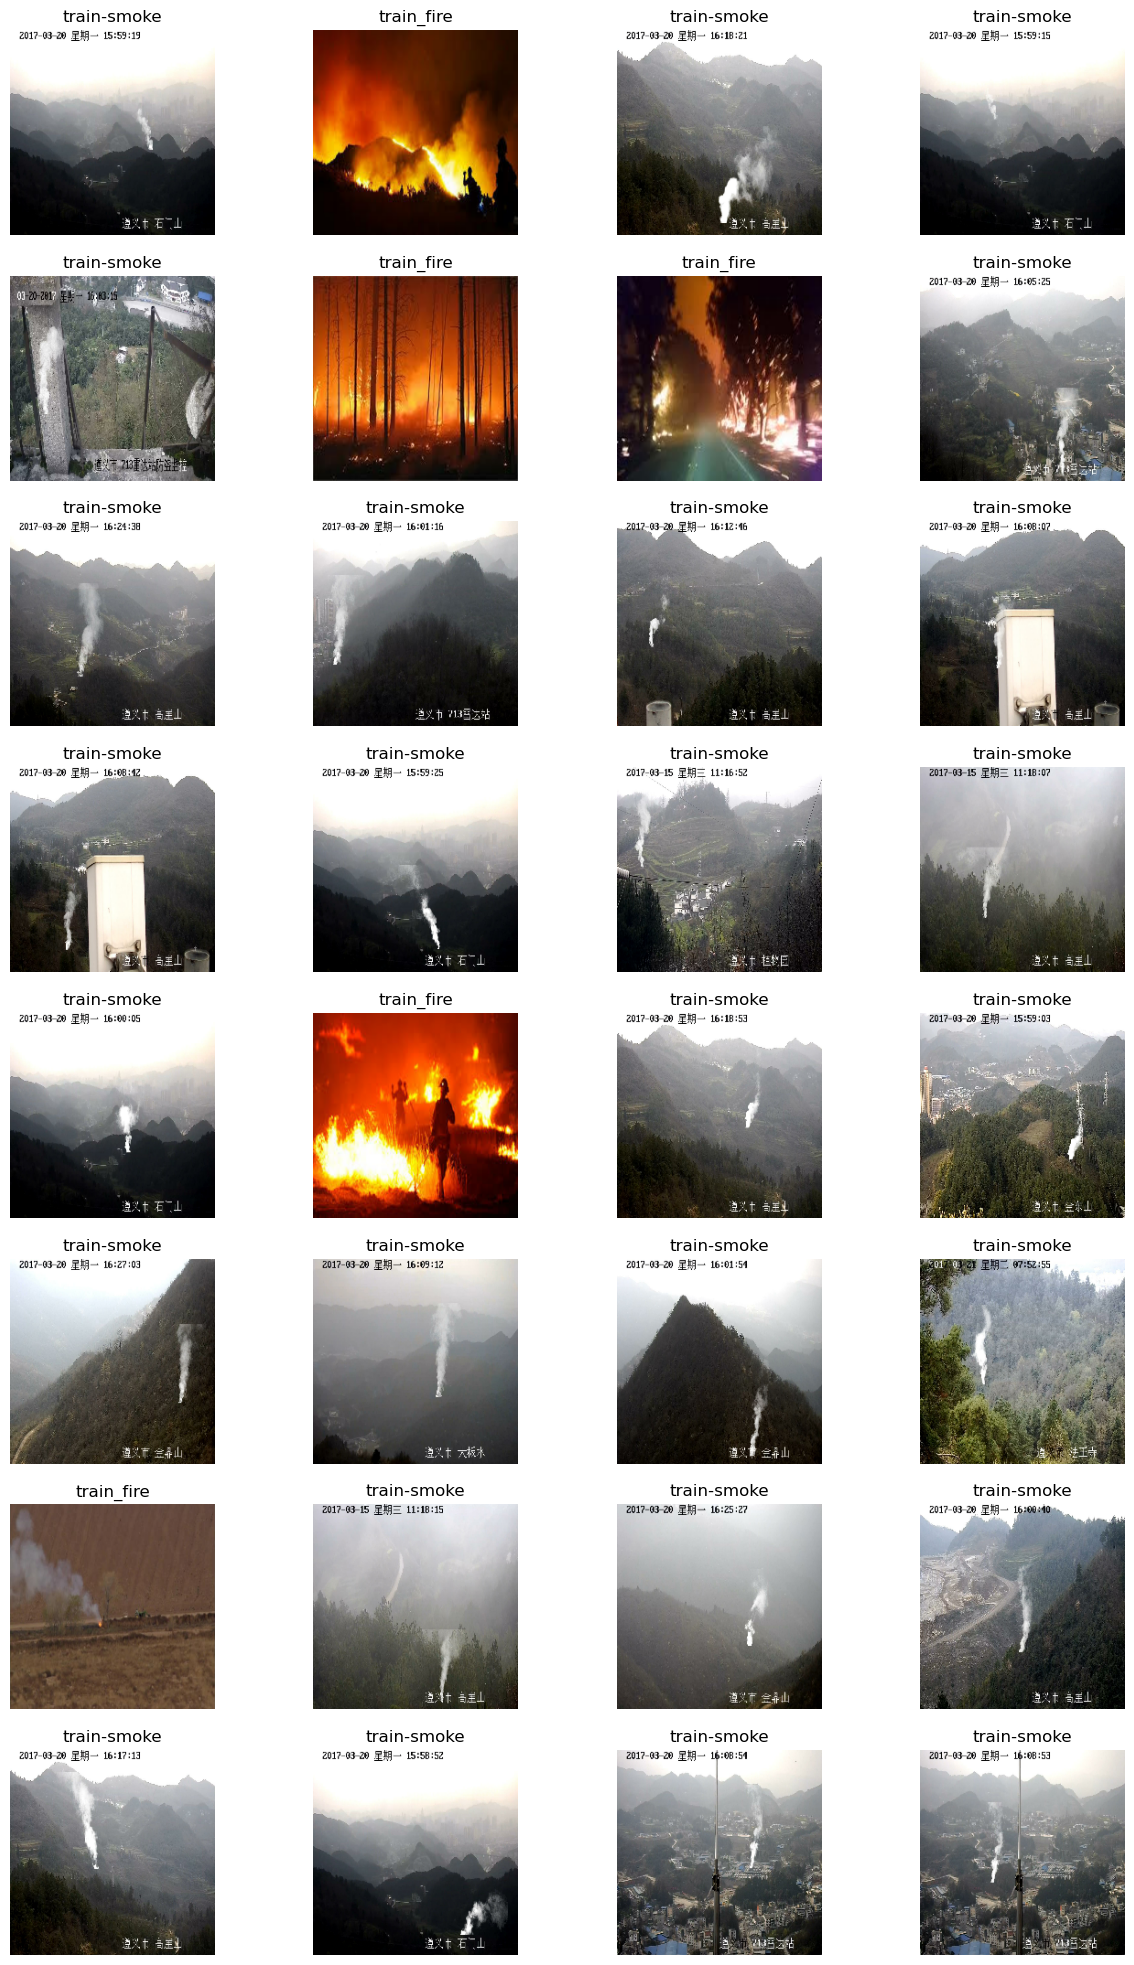

In [12]:
# Plotting the sample Images from the dataset
plt.figure(figsize=(15, 25))
for images, labels in train.take(1):
    for i in range(32):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
from tensorflow.keras.layers import Input

In [12]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16

# Create base model using VGG16
base_model = VGG16(input_tensor=Input(shape=(224, 224, 3)), include_top=False, weights='imagenet')

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create the top model
top_model = Flatten()(base_model.output)
top_model = Dropout(0.2)(top_model)
output_layer = Dense(1, activation='sigmoid')(top_model)

# Combine the base and top models
model = Model(inputs=base_model.input, outputs=output_layer)

# Print model summary
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [13]:
#saving the model
checkpoint_cb =ModelCheckpoint(r"C:\Users\91849\Desktop\MP RUN\model3.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=3, restore_best_weights=True)
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics=['accuracy'])
hist=model.fit(train,epochs=5,validation_data=validation,callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/5


344/344 [==============================] - 1764s 5s/step - loss: 0.0394 - accuracy: 0.9960 - val_loss: 1.2357e-08 - val_accuracy: 1.0000
Epoch 2/5
344/344 [==============================] - 1898s 6s/step - loss: 2.3883e-04 - accuracy: 0.9999 - val_loss: 4.5974e-08 - val_accuracy: 1.0000
Epoch 3/5
344/344 [==============================] - 2744s 8s/step - loss: 3.3130e-05 - accuracy: 1.0000 - val_loss: 5.1014e-05 - val_accuracy: 1.0000
Epoch 4/5
344/344 [==============================] - 2755s 8s/step - loss: 0.0043 - accuracy: 0.9995 - val_loss: 7.6778e-09 - val_accuracy: 1.0000
Epoch 5/5
344/344 [==============================] - 30449s 89s/step - loss: 1.7100e-08 - accuracy: 1.0000 - val_loss: 9.4489e-09 - val_accuracy: 1.0000


In [ ]:
# score, acc = model.evaluate(validation)
# print('Test Loss =', score)
# print('Test Accuracy =', acc)
# Evaluate the model
score = model.evaluate(validation)
print('Test Loss =', score[0])
print('Test Accuracy =', score[1])


86/86 [==============================] - 329s 4s/step - loss: 5.6223e-10 - accuracy: 1.0000
Test Loss = 5.622312060360457e-10
Test Accuracy = 1.0


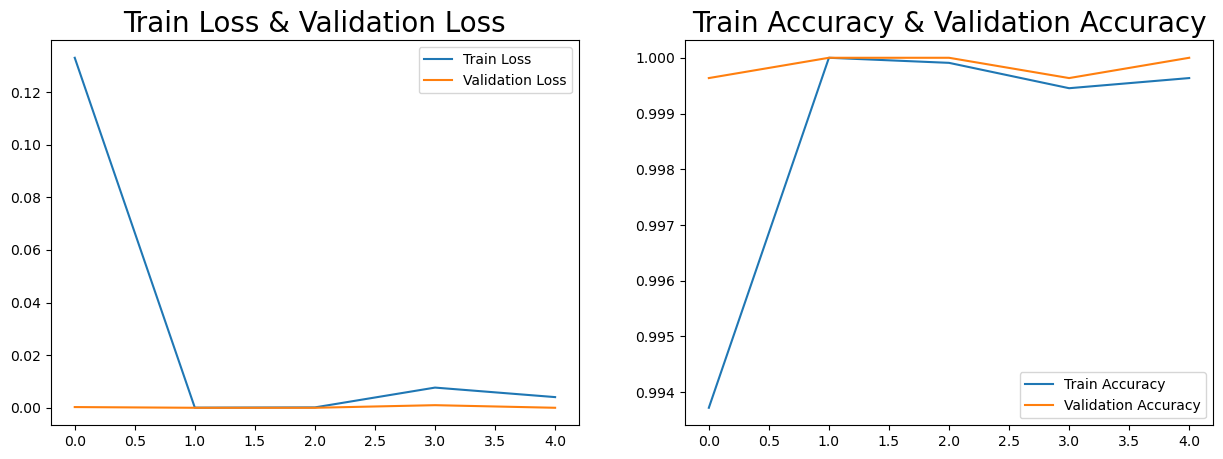

In [ ]:
# Plot training history
3+9
hist_df = pd.DataFrame(hist.history)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(hist_df['loss'], label='Train Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
plt.title('Train Loss & Validation Loss', fontsize=20)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_df['accuracy'], label='Train Accuracy')
plt.plot(hist_df['val_accuracy'], label='Validation Accuracy')
plt.title('Train Accuracy & Validation Accuracy', fontsize=20)
plt.legend()

In [ ]:
# Predict and evaluate on validation set
X_val,y_val=[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=model.predict(np.array(X_val))
y_pred=np.where(predictions>=.5,1,0)
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

86/86 [==============================] - 2484s 29s/step


Actual  Prediction
0          0           0
1          0           0
2          0           0
3          0           0
4          0           0
...      ...         ...
2741       0           0
2742       0           0
2743       0           0
2744       0           0
2745       0           0

[2746 rows x 2 columns]

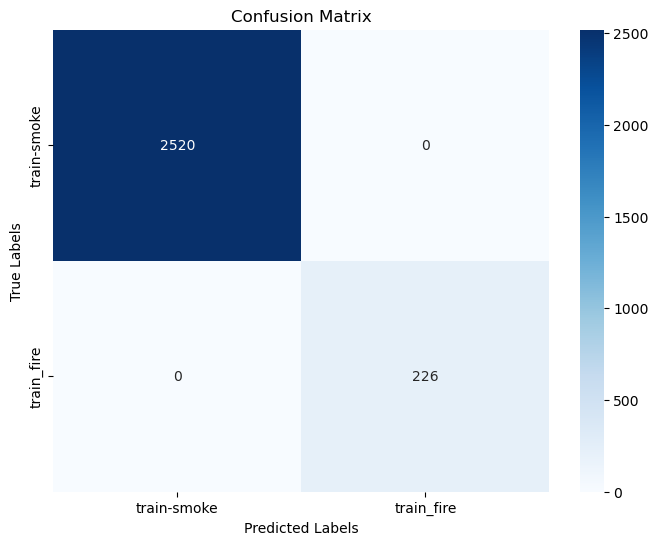

In [ ]:


# Generate confusion matrix
conf_matrix = confusion_matrix(y_val,y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

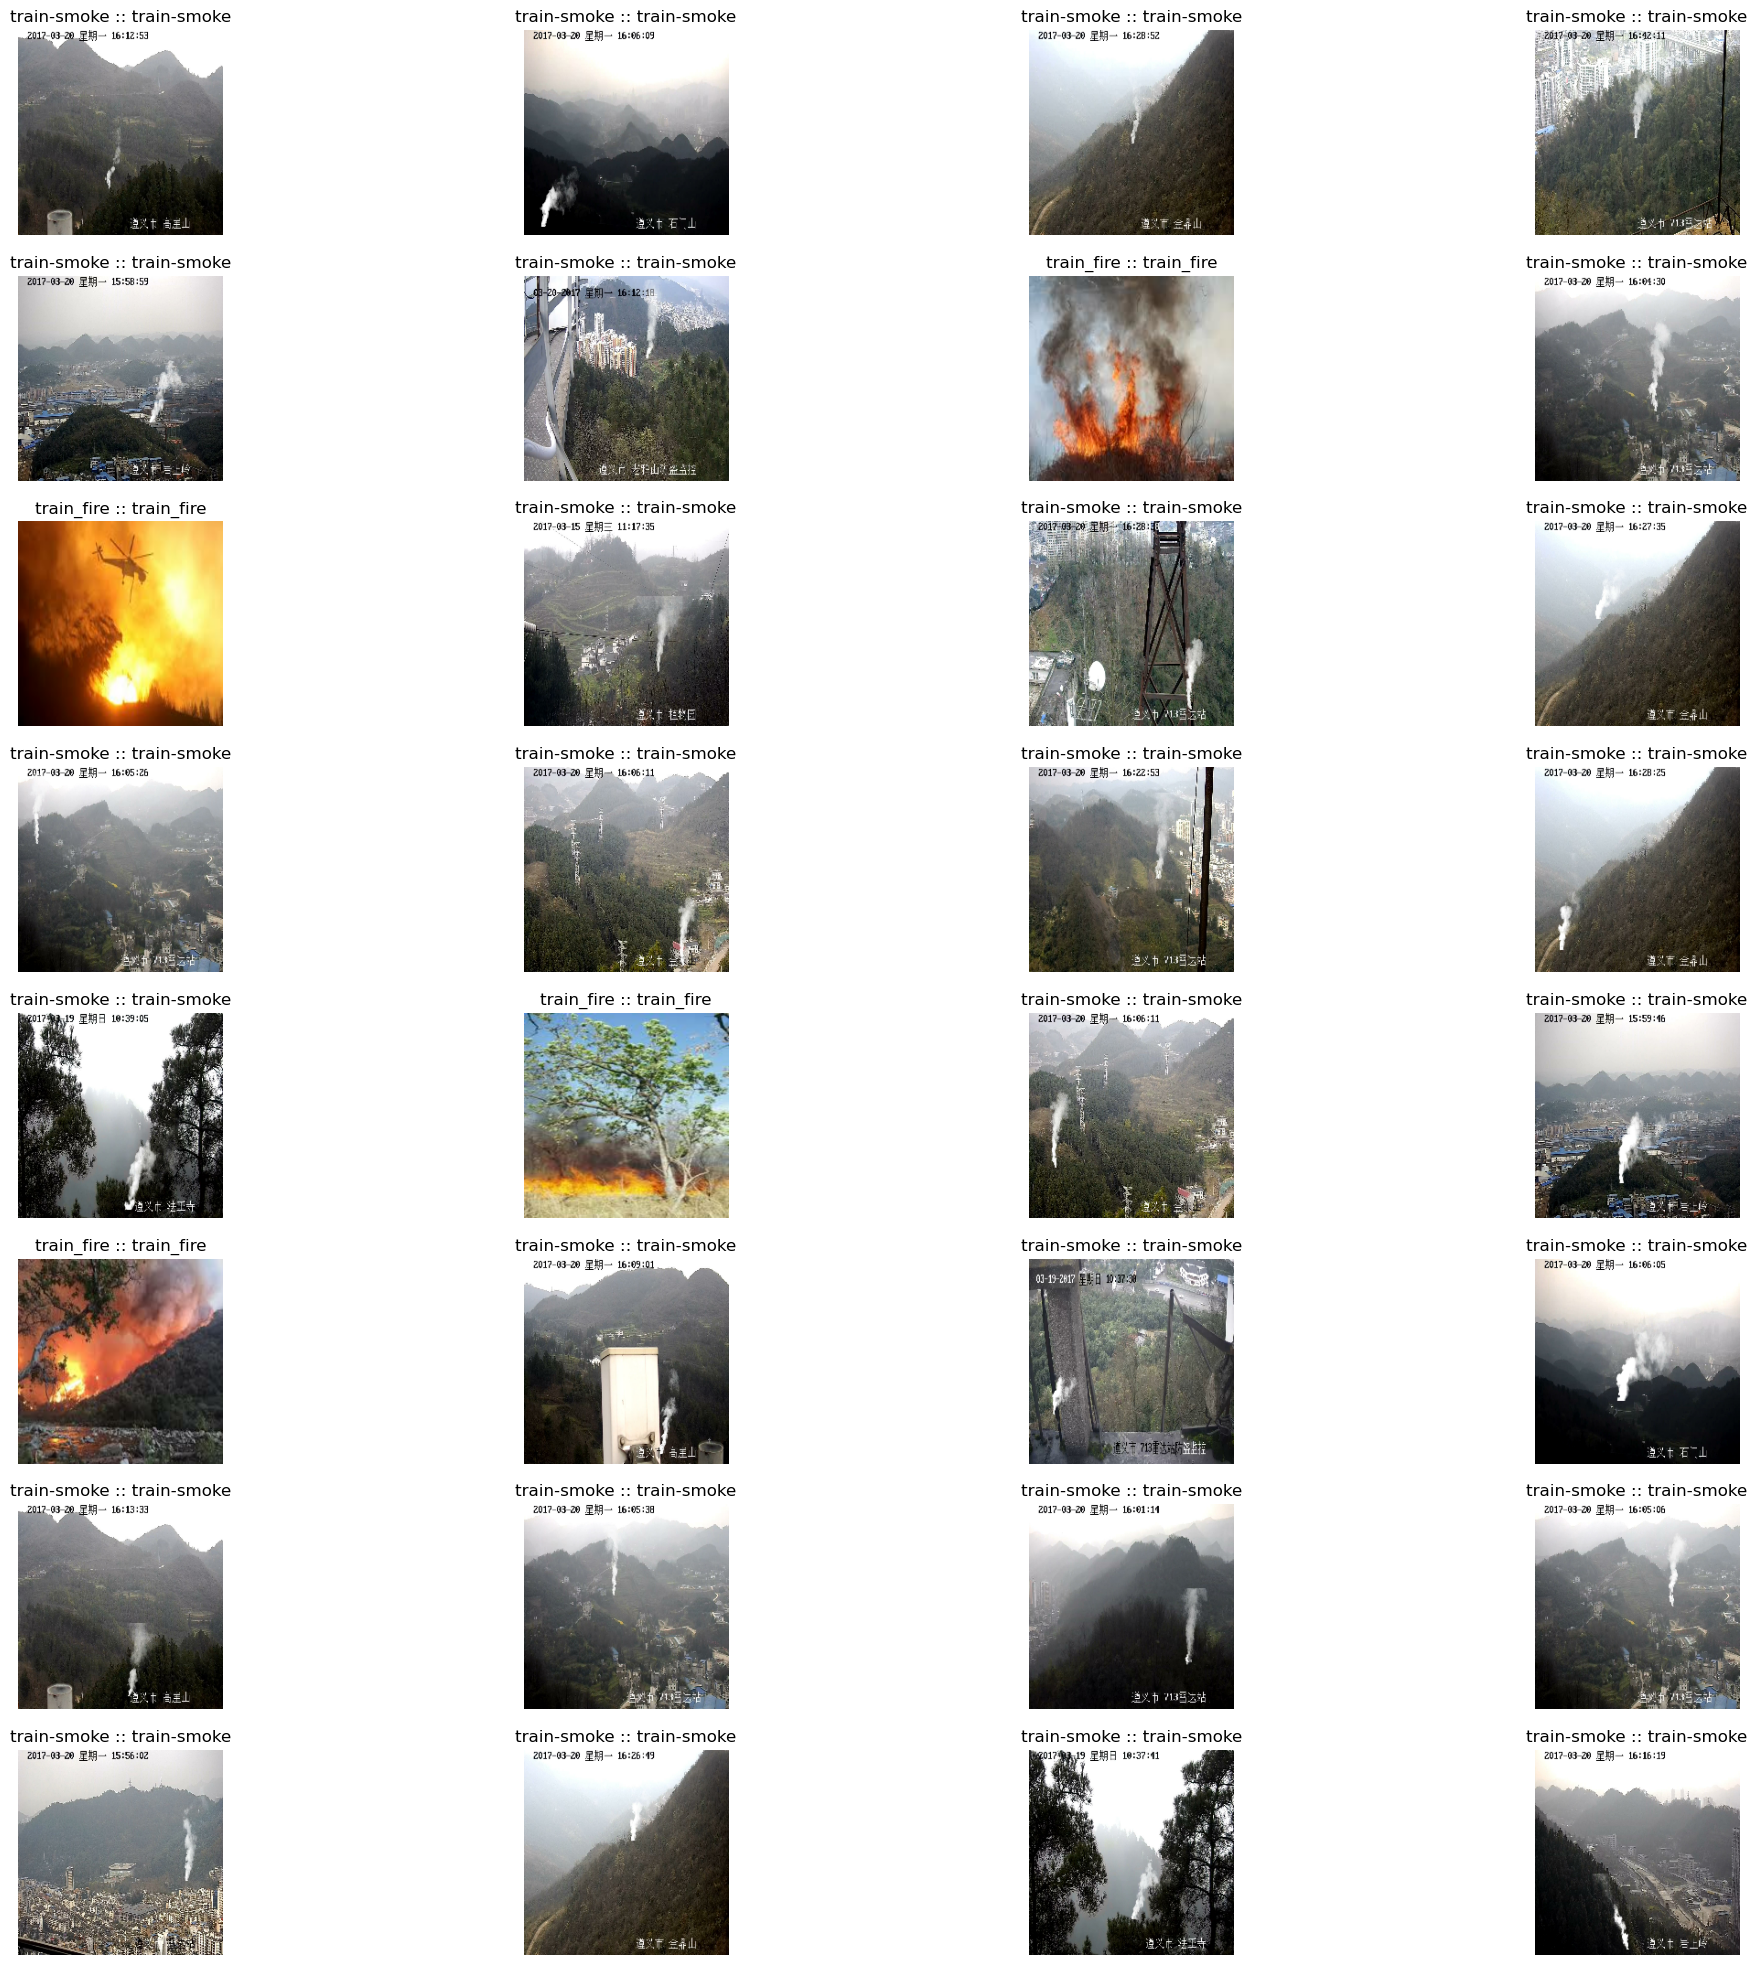

In [ ]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i][0]]}')
    plt.axis("off")

In [ ]:
ClassificationReport = classification_report(y_val,y_pred)
print('Classification Report is : ', ClassificationReport)

Classification Report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2520
           1       1.00      1.00      1.00       226

    accuracy                           1.00      2746
   macro avg       1.00      1.00      1.00      2746
weighted avg       1.00      1.00      1.00      2746



In [ ]:
def Test_single(path):
    save_model = keras.models.load_model(r'C:\Users\91849\my_keras_model.h5')

    # Read the image
    image = cv2.imread(path)
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Expand dimensions and predict
    image = np.expand_dims(image, axis=0)
    prediction = save_model.predict(image)

    # Get binary output based on threshold (change 0.5 if needed)
    binary_output = np.where(prediction >= 0.5, 1, 0)[0][0]
    if binary_output ==1:
        print("Fire Image")
    else:
        print("Smoke Image")

    # Print the binary output
    #print(f"Binary Output: {binary_output}")
    

    # Optionally, you can display the image too
    # plt.imshow(image.astype("uint8"))
    # plt.axis("off")
    # plt.show()

# Example usage
Test_single(r"C:\Users\91849\Downloads\project\Training Data\train-smoke\012518.jpg")
# if binary_output ==1:
#     print("Fire image")
# else:
#     print("Smoke")

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
def Test(path):
    save_model = keras.models.load_model(r'C:\Users\91849\Desktop\MP RUN\model2.h5')
    images = []
    pred = []
    class_names = ['fire_images', 'smoke_images']
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path, img))
        image = cv2.resize(image, (224, 224))
        image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        images.append(image)
        image = np.expand_dims(image, axis=0)
        predict = save_model.predict(image)
        pred.append(np.where(predict >= 0.5, 1, 0))
    plt.figure(figsize=(25, 25))
    for i in range(len(pred)):
        plt.subplot(int(np.ceil(len(pred) / 2)), 2, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title(f'{class_names[pred[i][0][0]]}')
        plt.axis("off")
  


1/1 [==============================] - 0s 383ms/step


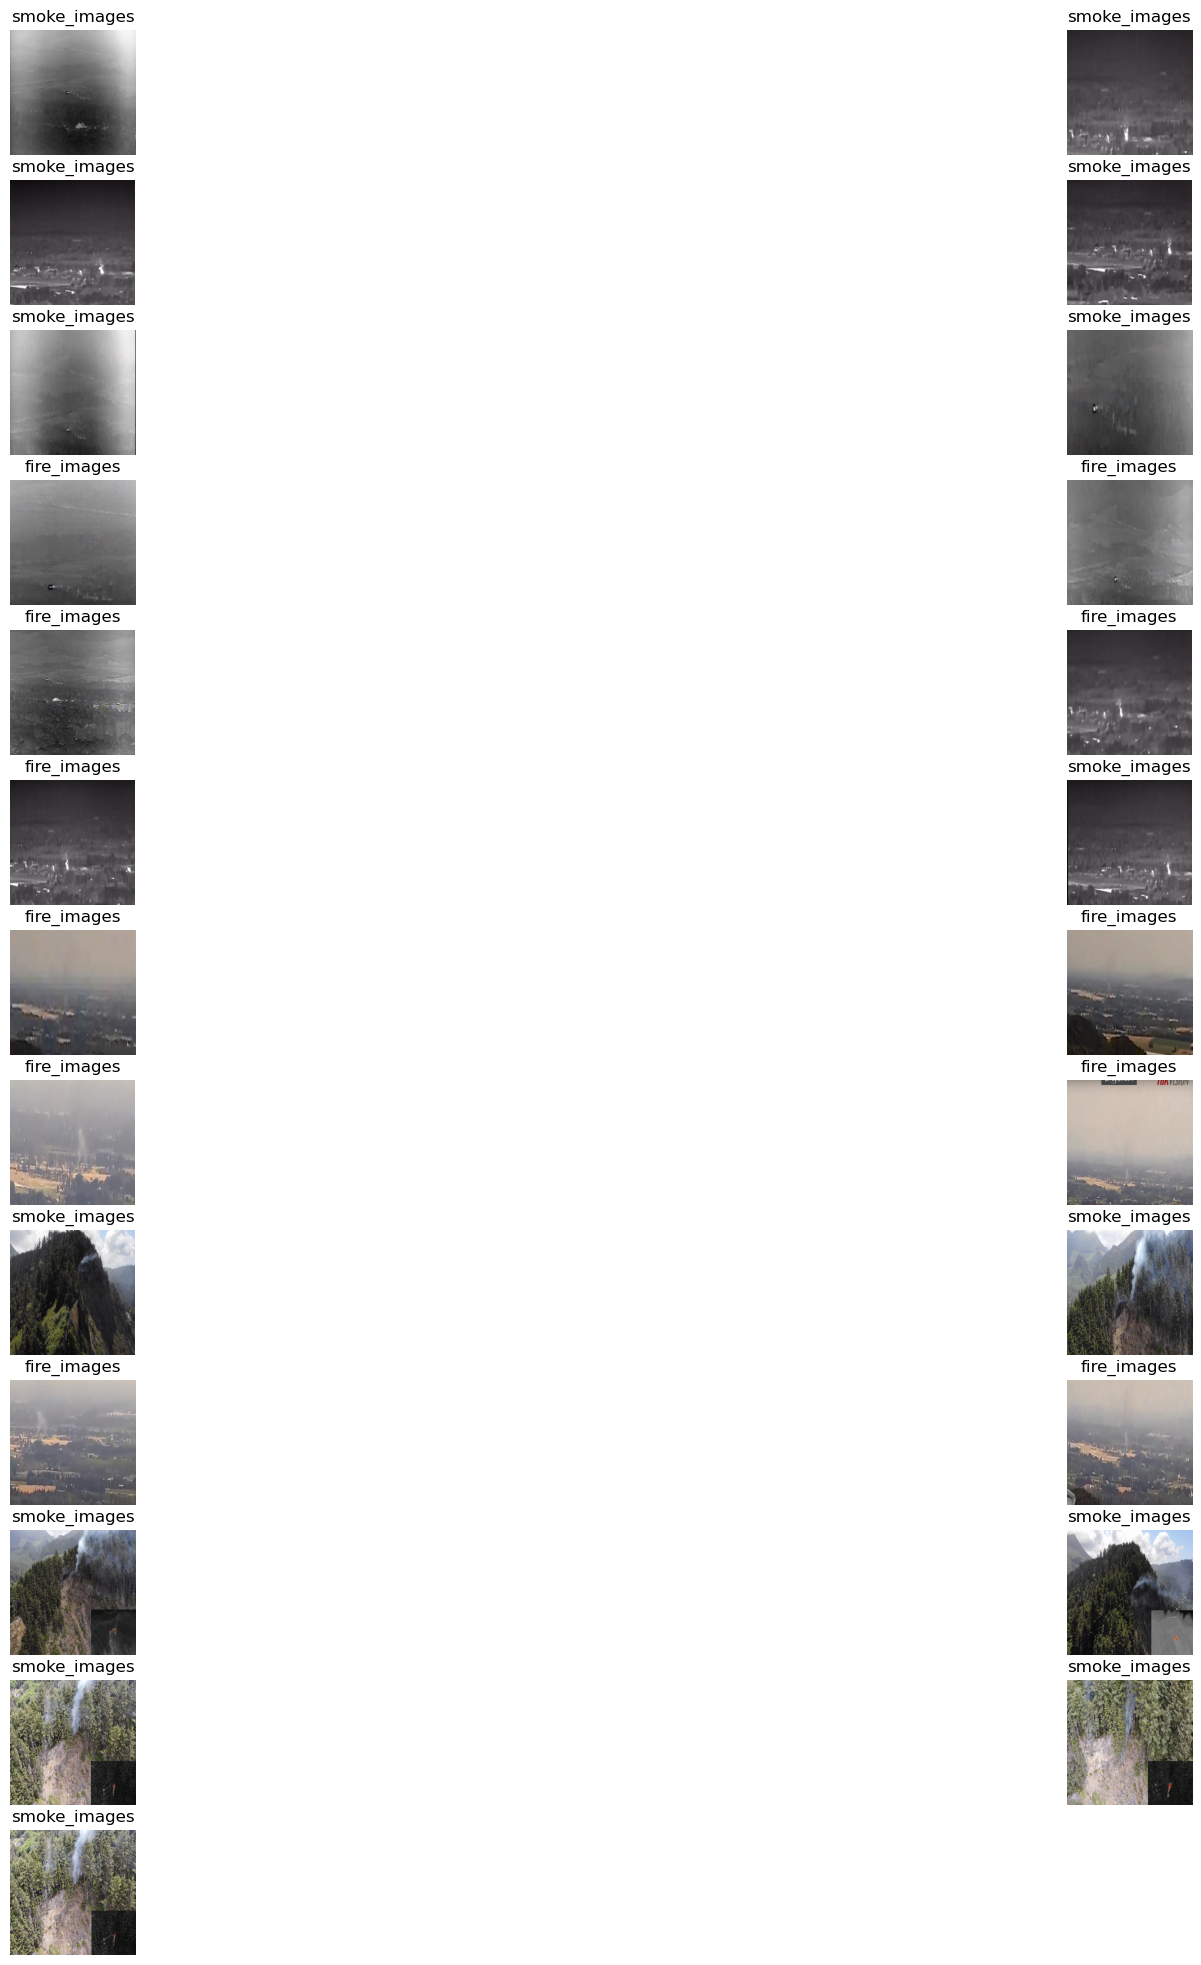

In [ ]:
plt.show()
Test(r"C:\Users\91849\Desktop\MP RUN\dataset\test_small")

# Inceptionv3

In [ ]:
from tensorflow.keras.applications import InceptionV3


In [ ]:
base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

In [ ]:
model = keras.models.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))  # Consider adjusting dropout rate
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid)) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_1 (Dropout)         (None, 51200)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51201     
                                                                 
Total params: 21853985 (83.37 MB)
Trainable params: 51201 (200.00 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
checkpoint_cb =ModelCheckpoint("inception_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=3, restore_best_weights=True)
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics=['accuracy'])
hist=model.fit(train,epochs=5,validation_data=validation,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/5
344/344 [==============================] - 649s 2s/step - loss: 2.5780 - accuracy: 0.9761 - val_loss: 0.3106 - val_accuracy: 0.9949
Epoch 2/5
344/344 [==============================] - 629s 2s/step - loss: 0.4219 - accuracy: 0.9931 - val_loss: 0.2370 - val_accuracy: 0.9960
Epoch 3/5
344/344 [==============================] - 627s 2s/step - loss: 0.4846 - accuracy: 0.9938 - val_loss: 0.5631 - val_accuracy: 0.9942
Epoch 4/5
344/344 [==============================] - 633s 2s/step - loss: 0.6651 - accuracy: 0.9939 - val_loss: 0.1523 - val_accuracy: 0.9985
Epoch 5/5
344/344 [==============================] - 632s 2s/step - loss: 0.3364 - accuracy: 0.9964 - val_loss: 0.2194 - val_accuracy: 0.9982


In [ ]:
score = model.evaluate(validation)
print('Test Loss =', score[0])
print('Test Accuracy =', score[1])


86/86 [==============================] - 129s 1s/step - loss: 0.2194 - accuracy: 0.9982
Test Loss = 0.21936152875423431
Test Accuracy = 0.9981791973114014


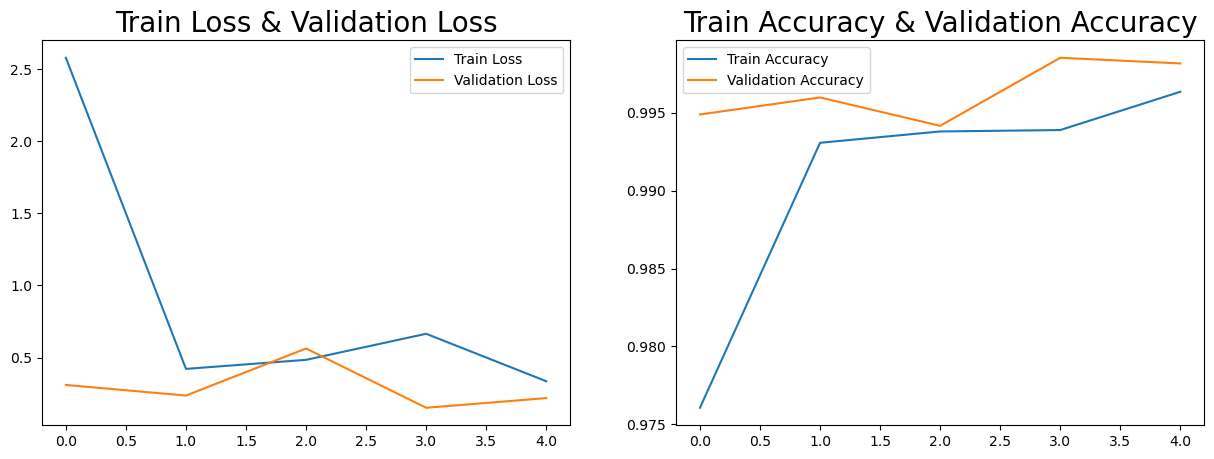

In [ ]:
# Plot training history
hist_df = pd.DataFrame(hist.history)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(hist_df['loss'], label='Train Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
plt.title('Train Loss & Validation Loss', fontsize=20)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_df['accuracy'], label='Train Accuracy')
plt.plot(hist_df['val_accuracy'], label='Validation Accuracy')
plt.title('Train Accuracy & Validation Accuracy', fontsize=20)
plt.legend()

In [ ]:
# Predict and evaluate on validation set
X_val,y_val=[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=model.predict(np.array(X_val))
y_pred=np.where(predictions>=.5,1,0)
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

86/86 [==============================] - 124s 1s/step


Actual  Prediction
0          0           0
1          0           0
2          0           0
3          0           0
4          1           1
...      ...         ...
2741       0           0
2742       0           0
2743       1           1
2744       1           1
2745       0           0

[2746 rows x 2 columns]

In [ ]:
ClassificationReport = classification_report(y_val,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2520
           1       0.98      1.00      0.99       226

    accuracy                           1.00      2746
   macro avg       0.99      1.00      0.99      2746
weighted avg       1.00      1.00      1.00      2746



In [ ]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i][0]]}')
    plt.axis("off")

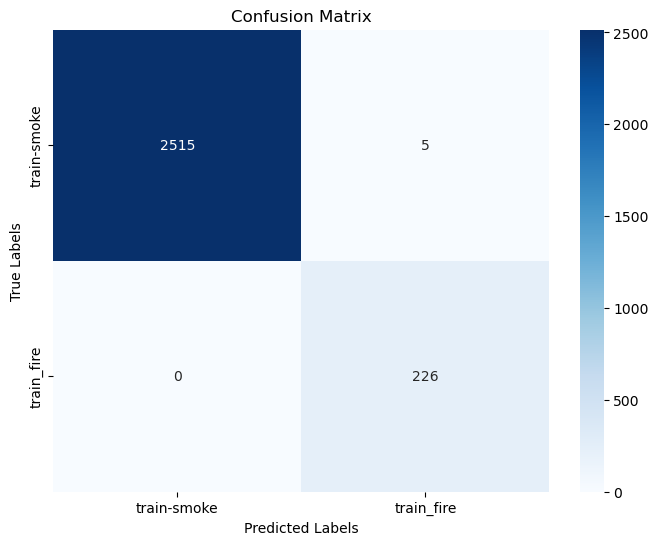

array([[2515,    5],
       [   0,  226]], dtype=int64)

In [ ]:


# Generate confusion matrix
conf_matrix = confusion_matrix(y_val,y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
conf_matrix

In [ ]:
def Test(path):
    save_model = keras.models.load_model(r'C:\Users\91849\my_keras_model1.h5')
    images = []
    pred = []
    class_names = ['fire_images', 'smoke_images']
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path, img))
        image = cv2.resize(image, (224, 224))
        image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        images.append(image)
        image = np.expand_dims(image, axis=0)
        predict = save_model.predict(image)
        pred.append(np.where(predict >= 0.5, 1, 0))
    plt.figure(figsize=(25, 25))
    for i in range(len(pred)):
        plt.subplot(int(np.ceil(len(pred) / 2)), 2, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title(f'{class_names[pred[i][0][0]]}')
        plt.axis("off")
  


In [ ]:
plt.show()
Test(r"C:\Users\91849\Downloads\project\test_small")

# Xception

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Flatten, Dense, Dropout
#from tensorflow.keras.models import Model

In [ ]:
base_model = Xception(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

In [ ]:
model = keras.models.Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))  # Regularization
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dropout_2 (Dropout)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 100353    
                                                                 
Total params: 20961833 (79.96 MB)
Trainable params: 100353 (392.00 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [ ]:
checkpoint_cb =ModelCheckpoint("Xception_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=3, restore_best_weights=True)
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics=['accuracy'])
hist=model.fit(train,epochs=5,validation_data=validation,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/5


344/344 [==============================] - 1203s 3s/step - loss: 1.4446 - accuracy: 0.9854 - val_loss: 0.4986 - val_accuracy: 0.9945
Epoch 2/5
164/344 [=============>................] - ETA: 8:57 - loss: 1.1838 - accuracy: 0.9889

In [ ]:
score = model.evaluate(validation)
print('Test Loss =', score[0])
print('Test Accuracy =', score[1])


86/86 [==============================] - 170s 2s/step - loss: 0.0059 - accuracy: 0.9996
Test Loss = 0.0058502452448010445
Test Accuracy = 0.9996358156204224


In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

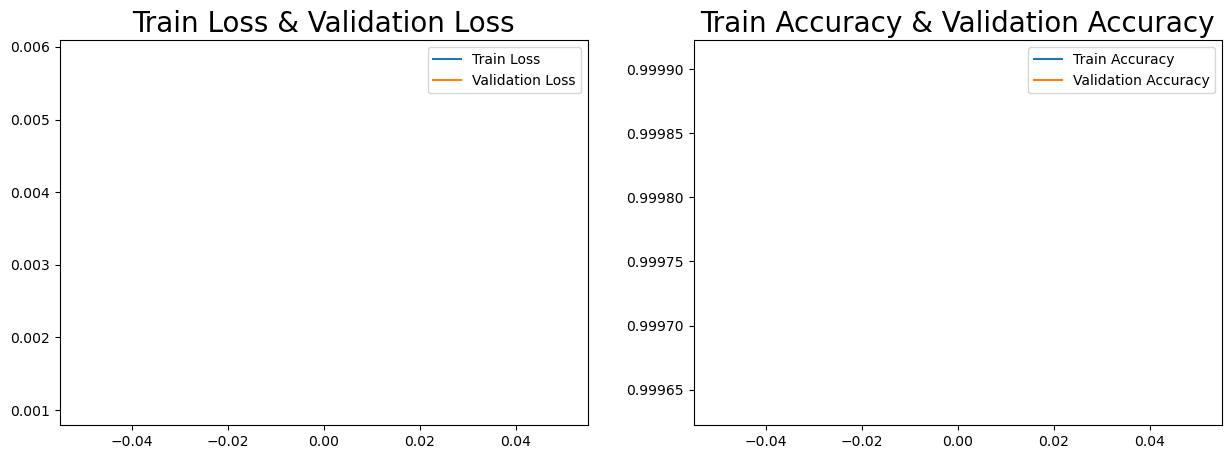

In [ ]:
# Plot training history
hist_df = pd.DataFrame(hist.history)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(hist_df['loss'], label='Train Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
plt.title('Train Loss & Validation Loss', fontsize=20)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_df['accuracy'], label='Train Accuracy')
plt.plot(hist_df['val_accuracy'], label='Validation Accuracy')
plt.title('Train Accuracy & Validation Accuracy', fontsize=20)
plt.legend()

In [ ]:
# Predict and evaluate on validation set
X_val,y_val=[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=model.predict(np.array(X_val))
y_pred=np.where(predictions>=.5,1,0)
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

86/86 [==============================] - 253s 3s/step


Actual  Prediction
0          1           1
1          0           0
2          1           1
3          0           0
4          1           1
...      ...         ...
2741       0           0
2742       1           1
2743       0           0
2744       0           0
2745       0           0

[2746 rows x 2 columns]

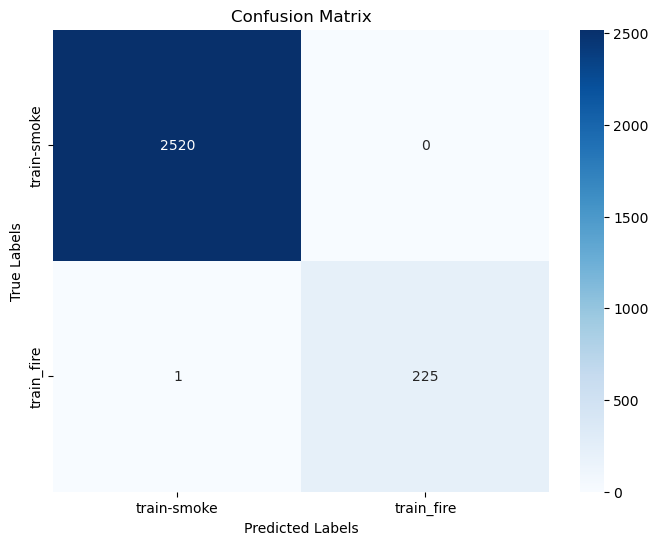

In [ ]:


# Generate confusion matrix
conf_matrix = confusion_matrix(y_val,y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def Test(path):
    save_model = keras.models.load_model(r'C:\Users\91849\my_keras_model2.h5')
    images = []
    pred = []
    class_names = ['fire_images', 'smoke_images']
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path, img))
        image = cv2.resize(image, (224, 224))
        image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        images.append(image)
        image = np.expand_dims(image, axis=0)
        predict = save_model.predict(image)
        pred.append(np.where(predict >= 0.5, 1, 0))
    plt.figure(figsize=(25, 25))
    for i in range(len(pred)):
        plt.subplot(int(np.ceil(len(pred) / 2)), 2, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title(f'{class_names[pred[i][0][0]]}')
        plt.axis("off")

In [ ]:
plt.show()
Test(r"C:\Users\91849\Downloads\project\test_small")

In [ ]:
ClassificationReport = classification_report(y_val,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2520
           1       1.00      1.00      1.00       226

    accuracy                           1.00      2746
   macro avg       1.00      1.00      1.00      2746
weighted avg       1.00      1.00      1.00      2746



# ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load ResNet50 base model
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# ... (rest of the code is the same as the InceptionV3 example)


In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
# Add classification layers
model = keras.models.Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))  # Increased dropout for regularization
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dropout_3 (Dropout)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 1)                 100353    
                                                                 
Total params: 23688065 (90.36 MB)
Trainable params: 100353 (392.00 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
checkpoint_cb =ModelCheckpoint("my_keras_model3.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=3, restore_best_weights=True)
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics=['accuracy'])
hist=model.fit_generator(train,epochs=1,validation_data=validation,callbacks=[checkpoint_cb,early_stopping_cb])

344/344 [==============================] - 1116s 3s/step - loss: 0.0269 - accuracy: 0.9960 - val_loss: 1.4226e-04 - val_accuracy: 1.0000


In [ ]:
score = model.evaluate(validation)
print('Test Loss =', score[0])
print('Test Accuracy =', score[1])


86/86 [==============================] - 244s 3s/step - loss: 0.0059 - accuracy: 0.9996
Test Loss = 0.0058502452448010445
Test Accuracy = 0.9996358156204224


In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

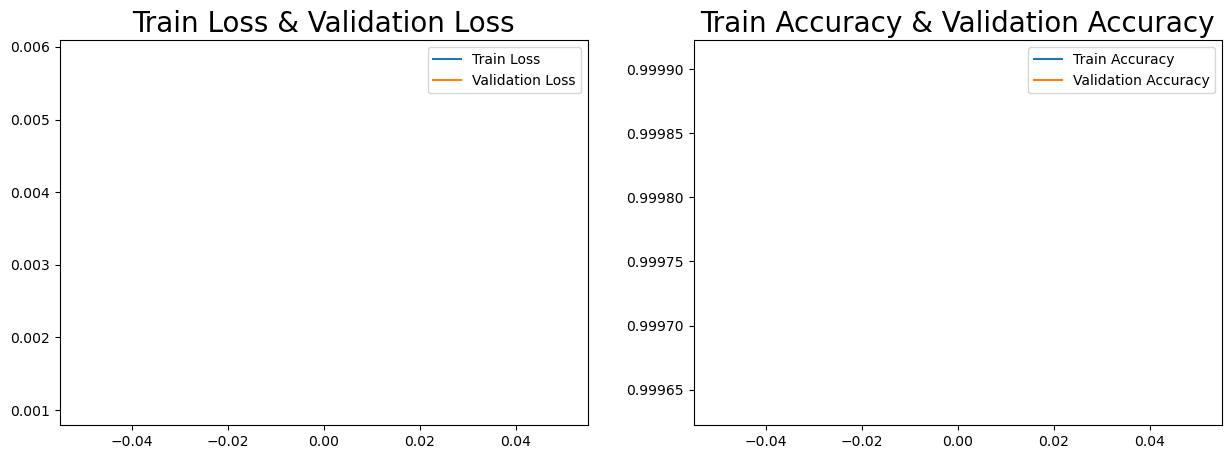

In [ ]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# plt.plot(hist_['loss'],label='Train_Loss')
# plt.plot(hist_['val_loss'],label='Validation_Loss')
# plt.title('Train_Loss & Validation_Loss',fontsize=20)
# plt.legend()
# plt.subplot(1,2,2)
# plt.plot(hist_['accuracy'],label='Train_Accuracy')
# plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
# plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
# plt.legend()
# Plot training history
hist_df = pd.DataFrame(hist.history)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(hist_df['loss'], label='Train Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
plt.title('Train Loss & Validation Loss', fontsize=20)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_df['accuracy'], label='Train Accuracy')
plt.plot(hist_df['val_accuracy'], label='Validation Accuracy')
plt.title('Train Accuracy & Validation Accuracy', fontsize=20)
plt.legend()

In [ ]:
# Predict and evaluate on validation set
X_val,y_val=[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=model.predict(np.array(X_val))
y_pred=np.where(predictions>=.5,1,0)
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

86/86 [==============================] - 249s 3s/step


Actual  Prediction
0          1           1
1          0           0
2          0           0
3          1           1
4          0           0
...      ...         ...
2741       0           0
2742       0           0
2743       1           1
2744       0           0
2745       0           0

[2746 rows x 2 columns]

In [ ]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()
CM

In [ ]:
def Test(path):
    save_model = keras.models.load_model(r'C:\Users\91849\my_keras_model3.h5')
    images = []
    pred = []
    class_names = ['fire_images', 'smoke_images']
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path, img))
        image = cv2.resize(image, (224, 224))
        image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        images.append(image)
        image = np.expand_dims(image, axis=0)
        predict = save_model.predict(image)
        pred.append(np.where(predict >= 0.5, 1, 0))
    plt.figure(figsize=(25, 25))
    for i in range(len(pred)):
        plt.subplot(int(np.ceil(len(pred) / 2)), 2, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title(f'{class_names[pred[i][0][0]]}')
        plt.axis("off")

In [ ]:
plt.show()
Test(r"C:\Users\91849\Downloads\project\test_small")

In [ ]:
print()

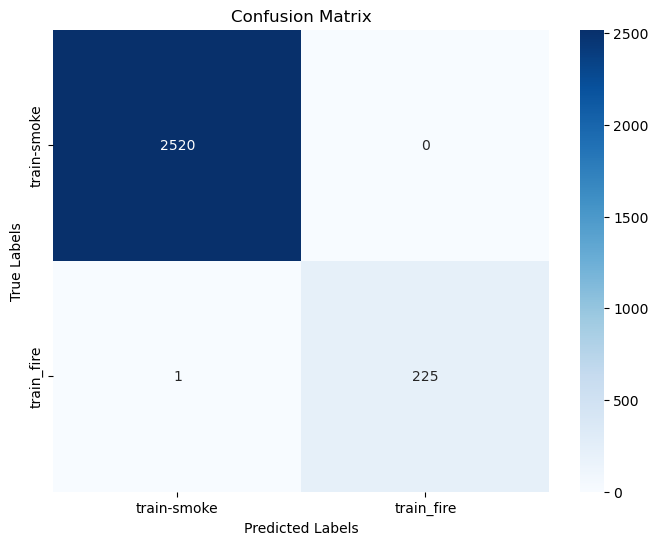

array([[2520,    0],
       [   3,  223]], dtype=int64)

In [ ]:


# Generate confusion matrix
conf_matrix = confusion_matrix(y_val,y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
CM

In [ ]:
ClassificationReport = classification_report(y_val,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2520
           1       1.00      1.00      1.00       226

    accuracy                           1.00      2746
   macro avg       1.00      1.00      1.00      2746
weighted avg       1.00      1.00      1.00      2746

